In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:\\Users\\Алексей\\Downloads\\Kaggle\\HR Analytics_Job Change of DS\\aug_train.csv')

###### enrolle_id : уникальный идентификатор кандидата
###### city: код города
###### city_ development _index : индекс развития города (масштабированный)
###### gender: пол кандидата
###### relevent_experience: соответствующий опыт кандидата
###### enrolled_university: тип зачисленного университетского курса, если таковой имеется
###### education_level: уровень образования кандидата
###### major_discipline : Образование, основная дисциплина кандидата
###### experience: Общий опыт кандидата в годах
###### company_size: Количество сотрудников в компании текущего работодателя
###### company_type : Тип текущего работодателя
###### last_new_job: разница в годах между предыдущей работой и текущей
###### training_hours: часы обучения завершены
###### target: 0 – Не ищу смену работы, 1 – Ищу смену работы

#### Задание
- Интерпретируйте модель (модели) таким образом, чтобы показать, какие особенности влияют на решение кандидата

In [8]:
df.head() #первые 5 строк нашего DataFrame

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
len(df) #количество строк

19158

In [10]:
df.size #количество записей

268212

In [11]:
df.dtypes #типы данных по каждому столбцу

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [12]:
df.columns #список столбцов

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
[i for i in df] #второй стпособ получить список столбцов

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [14]:
df.describe() #описательная статистика по столбцам с числовым типом данных

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [15]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [16]:
df.isna().mean().sort_values(ascending = False) #процент NaN значений по каждому столбцу

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

<Axes: >

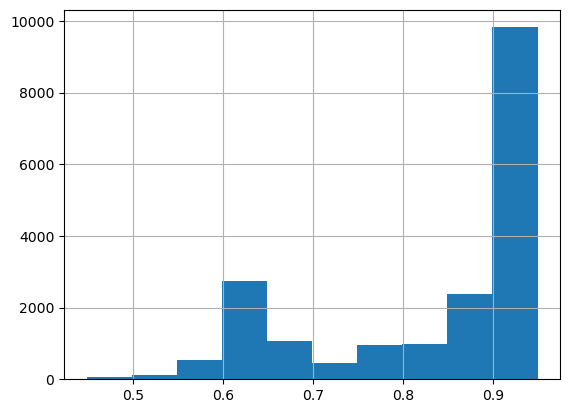

In [17]:
df['city_development_index'].hist() #гистограмма уровня развитости городов по индексу, в которых живут дата-сайнтисты

#### Большинство дата-сайнтистов живут в развитых городах 


#

In [18]:
df['gender'].value_counts(dropna = False) #количество значений в кажной категории столбца gender

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

<Axes: ylabel='gender'>

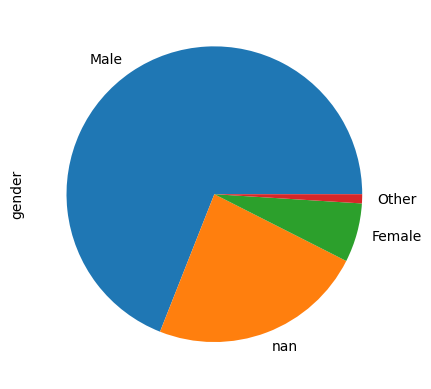

In [19]:
category_gender = df['gender'].value_counts(dropna = False)
category_gender.plot(kind = 'pie')

#### Большинство дата-сайнтистов мужчины

#

In [20]:
df['city_development_index'].quantile(0.5)

0.903

In [21]:
q = df['city_development_index'].quantile(0.05)

<Axes: >

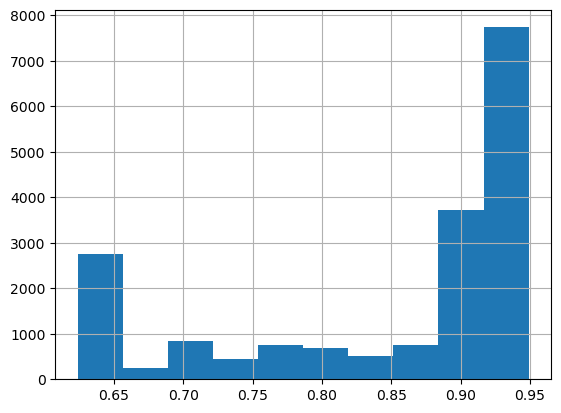

In [22]:
df[df['city_development_index'] >= q]['city_development_index'].hist()

#

In [23]:
df['target'].mean() * 100 # 25% дата-сайнтистов хотят сметить работу

24.934753105752165

In [24]:
df.groupby('gender', dropna = False)['target'].agg(['count', 'mean']).sort_values('mean', ascending = False) 
#Количество рабочих по категорям в gender и доля тех кто планирует сменить работу 

,count,mean
gender,,
NaN,4508,0.308119
Female,1238,0.263328
Other,191,0.261780
Male,13221,0.227819


In [25]:
df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean']).sort_values('mean', ascending = False)
#Количество рабочих по категорям в education_level и доля тех кто планирует сменить работу 

,count,mean
education_level,,
Graduate,11598,0.279790
NaN,460,0.226087
Masters,4361,0.214400
High School,2017,0.195340
Phd,414,0.140097
Primary School,308,0.133117


<Axes: xlabel='education_level'>

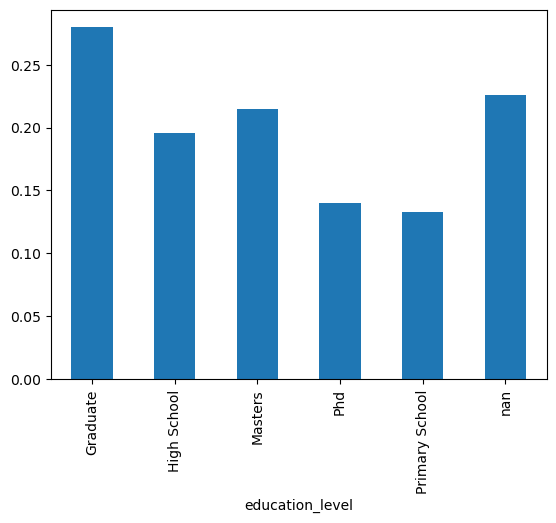

In [26]:
df.groupby('education_level', dropna = False)['target'].mean().plot(kind = 'bar')

#### Доля по каждой категории тех, кто хочет сменить работу

#

In [27]:
pd.cut(df['city_development_index'], 5) #делим непрерывную переменную на 5 интервалов

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [28]:
df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) #добавляем интервалы в DataFrame

In [29]:
df.groupby('city_development_index_group', dropna = False)['target'].agg(['count', 'mean'])\
                                                    .sort_values('mean', ascending = False)
#сгруппировали по уровню развитости города. Получили: большинство DS живет в развитых городах и меньше хотят сменить работу

,count,mean
city_development_index_group,,
"(0.548, 0.648]",3297,0.582651
"(0.447, 0.548]",178,0.578652
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


In [30]:
df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5, duplicates = 'drop')
#добавили новый столбец с интервалами, в которых лежит 'равное' количество записей 

In [31]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,"(0.849, 0.949]","(0.878, 0.92]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,"(0.749, 0.849]","(0.691, 0.878]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,"(0.548, 0.648]","(0.447, 0.691]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,"(0.749, 0.849]","(0.691, 0.878]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,"(0.749, 0.849]","(0.691, 0.878]"


In [32]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])\
                                                    .sort_values('mean', ascending = False)
#Сгруппировали по новым интервалам. 
#Эта таблица лучше отображает долю желающих перехать в другой город, от уровня развитости города

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [33]:
t = df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])\
                                                    .sort_values('mean', ascending = False)

<Axes: xlabel='city_development_index_group_q'>

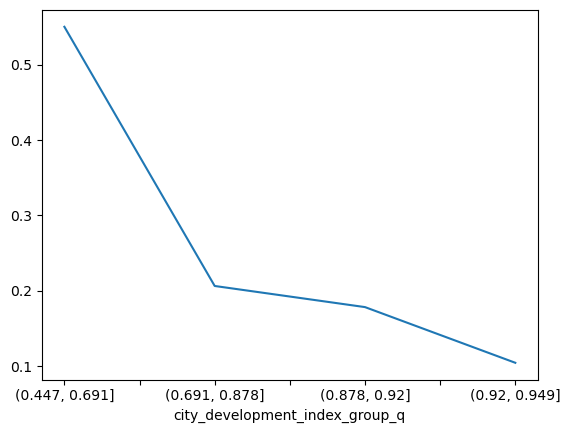

In [34]:
t['mean'].plot()

##### Чем выше индекс развитости города, тем меньше процент тех, кто хочет сменить работу

#

In [35]:
df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean']).sort_values('mean', ascending = False)

,count,mean
education_level,,
Graduate,11598,0.279790
NaN,460,0.226087
Masters,4361,0.214400
High School,2017,0.195340
Phd,414,0.140097
Primary School,308,0.133117


In [36]:
def education_group(x):                             #функция замены значений
    if x in ['High School', 'Primary School']:
        return 'School'
    if x in ['Masters', 'Phd']:
        return 'Masters_and_phd'
    return x

In [37]:
df['new_education_level'] = df['education_level'].apply(education_group) #создаем новый столбец с примененной функцией

In [38]:
df.groupby('new_education_level', dropna = False)['target'].agg(['count', 'mean']).sort_values('mean', ascending = False).reset_index()
#'сгруппированная' сводная таблица

,new_education_level,count,mean
0,Graduate,11598,0.279790
1,NaN,460,0.226087
2,Masters_and_phd,4775,0.207958
3,School,2325,0.187097


In [39]:
df['new_education_level'] = df['new_education_level'].fillna('no_info') #заменил NaN на no_info в столбце new_education_level

In [40]:
df['gender'] = df['gender'].fillna('no_info') #заменил NaN на no_info в столбце gender

In [41]:
t = df.pivot_table(index = 'new_education_level', columns = 'gender', values = 'target', aggfunc = [ 'mean'])
#сводная таблица меодом pivot_table

In [42]:
t

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters_and_phd      0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

In [43]:
import seaborn as sns

<Axes: xlabel='None-gender', ylabel='new_education_level'>

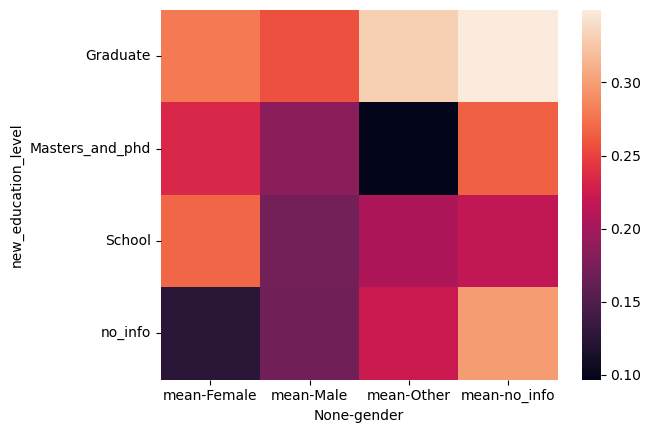

In [44]:
sns.heatmap(t)

In [50]:
df[['city_development_index', 'training_hours', 'target']].corr() #линейная корреляция

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


<Axes: >

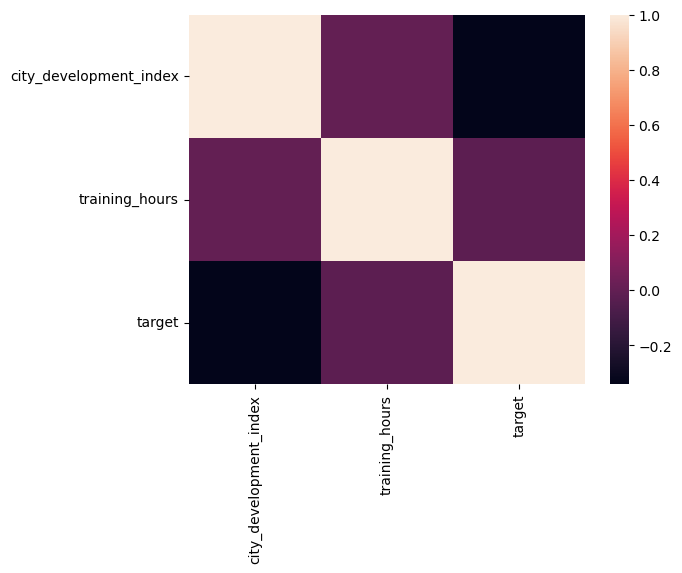

In [46]:
sns.heatmap(df[['city_development_index', 'training_hours', 'target']].corr())

In [2]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [47]:
phik_overview = df.phik_matrix() #матрица зависимостей всех переменных

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


In [48]:
phik_overview

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,new_education_level
enrollee_id,1.000000,0.214019,0.125181,0.125045,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472,0.118153,0.101484,0.051291
city,0.214019,1.000000,1.000000,0.235773,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283,1.000000,1.000000,0.381579
city_development_index,0.125181,1.000000,1.000000,0.163535,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287,1.000000,0.886906,0.174978
gender,0.125045,0.235773,0.163535,1.000000,0.175232,0.081010,0.051922,0.087460,0.202654,0.036975,0.073239,0.093596,0.009124,0.116653,0.114481,0.228761,0.151330
relevent_experience,0.073145,0.152621,0.101448,0.175232,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859,0.059986,0.094370,0.466830
enrolled_university,0.051188,0.376293,0.245979,0.081010,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803,0.174196,0.147038,0.153905
education_level,0.076123,0.363706,0.224368,0.051922,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999,0.127624,0.119003,1.000000
major_discipline,0.030968,0.178508,0.129083,0.087460,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200,0.101880,0.129442,0.084839
experience,0.086949,0.346552,0.307770,0.202654,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725,0.335891,0.358784,0.308699
company_size,0.032956,0.249869,0.130592,0.036975,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953,0.095912,0.150605,0.125750


<Axes: >

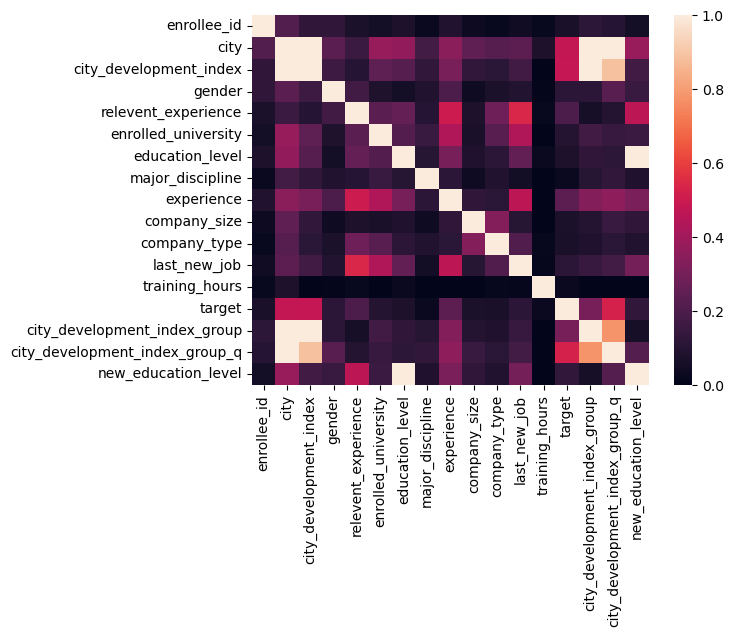

In [51]:
sns.heatmap(phik_overview) #heatmap корреляций

In [53]:
phik_overview['target'].sort_values(ascending = False)

target                            1.000000
city_development_index_group_q    0.523691
city_development_index            0.482287
city                              0.477283
city_development_index_group      0.302403
experience                        0.238725
relevent_experience               0.199859
new_education_level               0.132478
gender                            0.116653
last_new_job                      0.114708
enrolled_university               0.093803
education_level                   0.075999
company_size                      0.071953
enrollee_id                       0.067472
company_type                      0.066792
major_discipline                  0.029200
training_hours                    0.026849
Name: target, dtype: float64

##### видим что target сильно коррелирует с city_development_index, city 

#

<Axes: xlabel='city'>

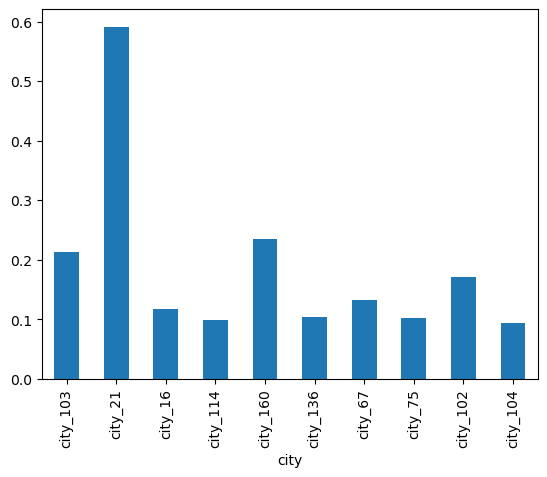

In [62]:
df.groupby('city', dropna = False)['target'].agg(['count', 'mean']).sort_values('count', ascending = False).head(10)['mean'].plot(kind ='bar')